## Extra stuff

[[ 4.68 -4.32]
 [-4.32  4.68]]
[[0.36 0.  ]
 [0.   9.  ]]


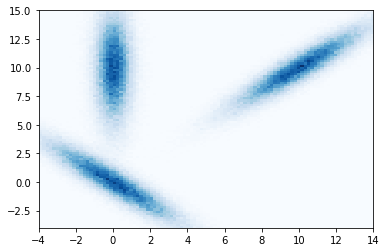

In [151]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi

def rot(a):
    return np.array([[cos(a), -sin(a)], [sin(a),cos(a)]])

def get_cov(a, b, angle):
    T=np.matmul(rot(angle), np.array([[a,0],[0,b]]))
    return np.matmul(T, T.T)  

#Z=np.random.rand(100,100)
mean1 = [0,0]
cov1 = get_cov(0.6, 3, angle=pi/4)
print(cov1)
mean2 = [10,10]
cov2 = get_cov(0.6, 3, angle=3*pi/4)
mean3 = [0,10]
#cov3 = [[1,0], [0,0.2]]
cov3 = get_cov(0.6, 3, angle=0)
print(cov3)
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100000).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100000).T
x3, y3 = np.random.multivariate_normal(mean3, cov3, 100000).T
x=np.hstack([x1,x2, x3])
y=np.hstack([y1,y2, y3])
#plt.imshow(Z)
plt.hist2d(x, y, bins=100, cmap='Blues', range=[[-4,14],[-4,15]]);

In [112]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 3, centers=4, random_state=2, cluster_std=1.5)
X -= np.min(X)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [106]:
# Print fitted parameters of a model
def print_parameters(model):
    for key in dir(model):
        if key[0] != '_' and key[-1] == '_':
            print(key, getattr(model, key))

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);
print_parameters(model)

class_count_ [50. 50.]
class_prior_ [0.5 0.5]
classes_ [0 1]
sigma_ [[2.06097005 2.47716872]
 [3.33164807 2.22401384]]
theta_ [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]


In [110]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(2.5725376741858366,
 15.612424709997448,
 -0.8356371992660553,
 17.19066528166902)

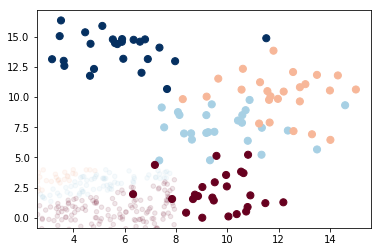

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)